In [1]:
# 回忆之前的例子
import numpy as np
import matplotlib.pyplot as plt

In [2]:
X = np.empty((100, 2))
X[:, 0] = np.random.uniform(0., 100., size=100)
X[:, 1] = 0.75 * X[:, 0] + 3. + np.random.normal(0, 5, size=100)

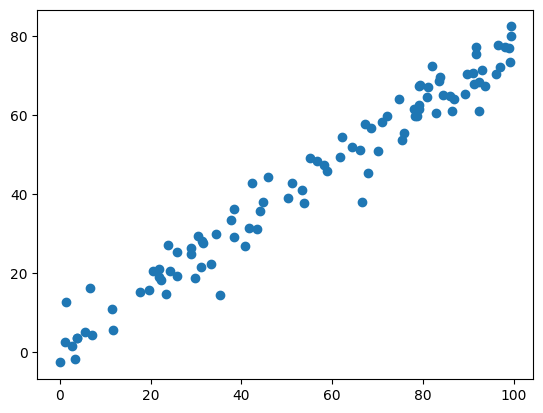

In [3]:
# 可能数据本来就是一条直线，但是可能有一些噪音
plt.scatter(X[:, 0], X[:, 1])
plt.show()

In [4]:
from sklearn.decomposition import PCA

pca = PCA(n_components=1)
pca.fit(X)
# 先升维，后降维
X_reduction = pca.transform(X)
x_restore = pca.inverse_transform(X_reduction)

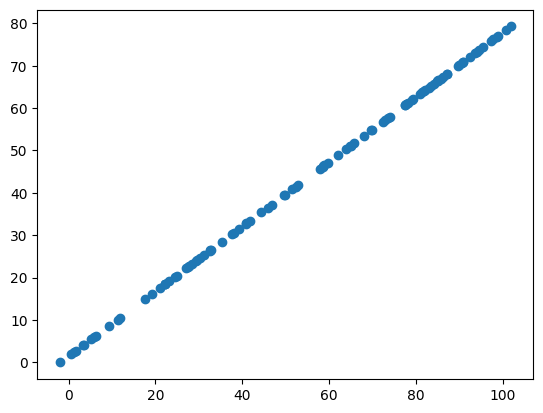

In [6]:
# 可以理解为，我们将原有的噪音去除了（但仍然可能有噪音）
# 但也有可能，本身的信息就是有抖动，所以我们也可以认为是丢失了信息
plt.scatter(x_restore[:, 0], x_restore[:, 1])
plt.show()

In [7]:
from sklearn import datasets

# 数字图片？
digits = datasets.load_digits()
X = digits.data
y = digits.target

In [8]:
# 手动创造一个有噪音的数据集
noisy_digits = X + np.random.normal(0, 4, size=(X.shape))

In [9]:
# 可视化来演示
example_digits = noisy_digits[y==0, :][:10]
for num in range(1, 10):
    X_num = noisy_digits[y==num, :][:10]
    example_digits = np.vstack([example_digits, X_num])

In [10]:
example_digits.shape

(100, 64)

In [12]:
def plot_digits(data):
    fig, axes = plt.subplots(10, 10, figsize=(10, 10),
                            subplot_kw={'xticks':[], 'yticks':[]},
    gridspec_kw=dict(hspace=0.1, wspace=0.1))
    
    for i, ax in enumerate(axes.flat):
        ax.imshow(data[i].reshape(8, 8),
                 cmap='binary', interpolation='nearest',
                 clim=(0, 16))
    plt.show()

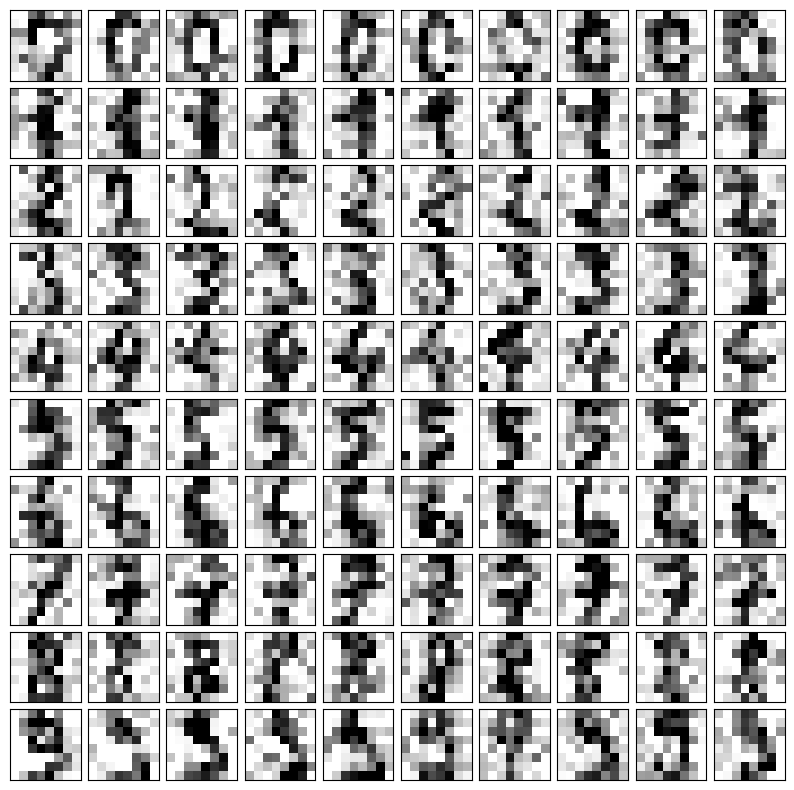

In [16]:
# 看看加了噪音的手写字体
plot_digits(example_digits)

In [17]:
# 下面进行降噪
# 因为觉得噪音较大，可以去除大部分的数据
pca = PCA(0.5)
pca.fit(noisy_digits)

PCA(n_components=0.5)

In [18]:
# 64降到了12维
pca.n_components_

12

In [19]:
# 先升维后降维去噪音
components = pca.transform(example_digits)
filtered_digits = pca.inverse_transform(components)

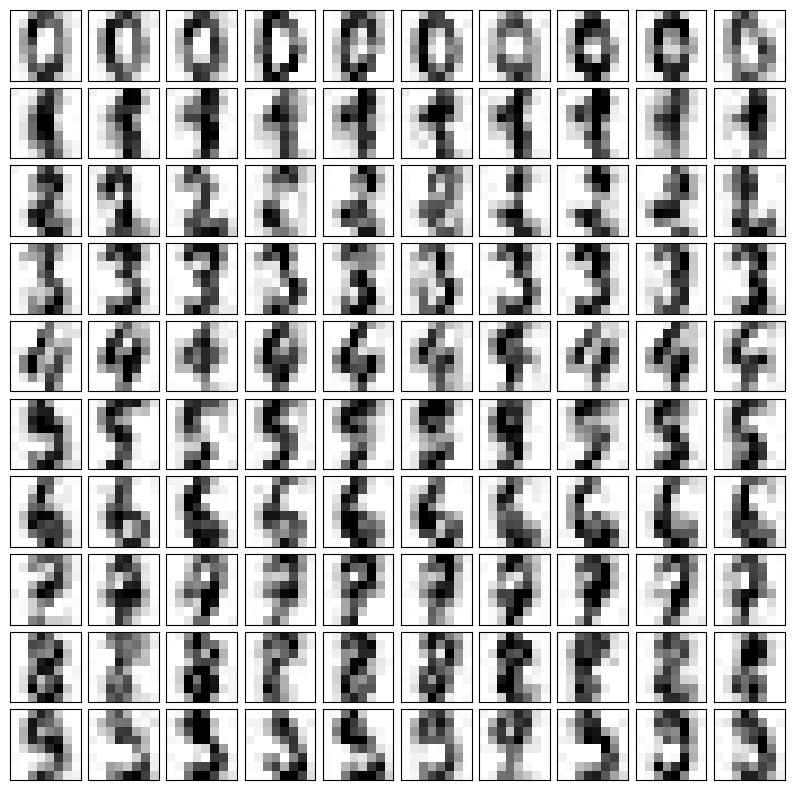

In [20]:
plot_digits(filtered_digits)

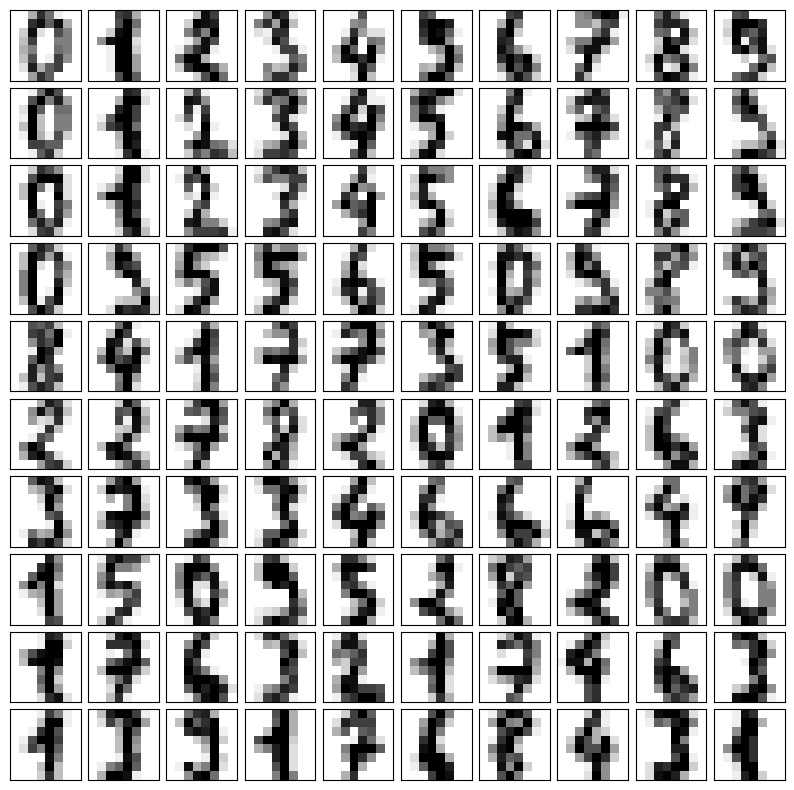

In [21]:
# 对比下原图像
plot_digits(X)